## MMPM 

- Sample tumor burden was estimated by calculating the number of tumor genome copies per mL of plasma.
- Mutant molecule per mL (MMPM) incorporates the allele fractions of the variant calls and the cell-free DNA (cfDNA) mass of the sample

if $\overline{AF}$ is mean allele frequency of the sample, it's calculated as below:


```math
MMPM = \overline{AF}\; \text{[0-1]}​ \times \frac{extracted\;mass\; \text{[ng]} \times 330 \; \text{[copies/ng]}}{plasma\;volume\; \text{[mL]}}
```


Looking at MMPM distributions in the 310 samples in GOYA.

In [2]:
import pandas as pd 

url = "https://ehsantabari.com/public/goya_paper/Supplementary_Table_1.xlsx"
goya = pd.read_excel(url) 

goya

,Sample number,Ann Arbor stage,NanoString,LPS score,FMI data available,Group,Treatment arm,ECOG PS,IPI score,Serum LDH,Bulky disease,Extracted mass (ng cfDNA),Plasma volume (mL),Input mass (ng cfDNA),Median deduped depth,Mean AF,Median AF,MAD,MATH,Corrected MMPM
0,1,III,GCB,917,True,Train (low),Obinutuzumab,0.0,High-Intermediate,Elevated,N,55.965,2.5,40.93,6774,0.004182,0.001173,0.000773,65.916953,30.891147
1,2,III,GCB,1176,True,Train (low),Rituximab,1.0,Low-Intermediate,Elevated,N,119.600,2.5,29.48,7115,0.054369,0.017381,0.024814,142.761107,858.328860
2,3,III,ABC,3025,True,Train (high),Obinutuzumab,0.0,Low-Intermediate,Elevated,N,146.900,2.5,50.00,6707,0.103586,0.079399,0.113012,142.333867,2008.620414
3,4,IV,GCB,1087,True,Train (low),Obinutuzumab,1.0,Low-Intermediate,Elevated,N,24.245,2.2,50.00,7866,0.024643,0.020713,0.017275,83.403532,89.621889
4,5,IV,GCB,1652,True,Test,Obinutuzumab,0.0,Low-Intermediate,Normal,N,11.440,2.8,20.30,3686,0.025979,0.012163,0.006356,52.257298,35.026581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,306,IV,GCB,479,True,Test,Obinutuzumab,0.0,Low-Intermediate,Normal,Y,29.510,1.4,22.70,2838,0.125481,0.129390,0.105915,81.856583,872.840263
306,307,III,GCB,-432,True,Pilot,Obinutuzumab,1.0,Low,Normal,N,10.800,2.5,8.76,909,0.248875,0.200238,0.271518,135.597595,354.795908
307,308,IV,GCB,947,True,Train (low),Rituximab,0.0,High-Intermediate,Elevated,N,40.560,2.0,31.20,6005,0.050138,0.029006,0.035903,123.775503,335.541944
308,309,II,ABC,3172,True,Train (high),Rituximab,0.0,High-Intermediate,Elevated,N,37.050,2.0,28.50,4087,0.014858,0.008621,0.007674,89.016607,90.831088


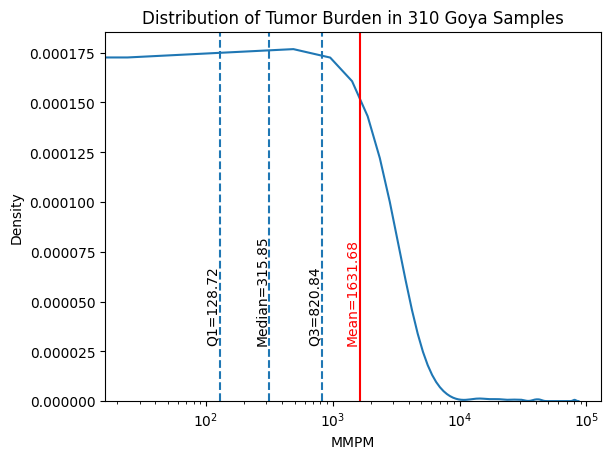

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.kdeplot(data=goya, x='Corrected MMPM', ax=ax)
# Calculate each statistic once
mean_val = goya['Corrected MMPM'].mean()
median_val = goya['Corrected MMPM'].median()
q1 = goya['Corrected MMPM'].quantile(0.25)
q3 = goya['Corrected MMPM'].quantile(0.75)

# Plot each line
ax.axvline(x=mean_val, color='red')
ax.axvline(x=median_val, linestyle='--')
ax.axvline(x=q1, linestyle='--')
ax.axvline(x=q3, linestyle='--')

# Now add text labels at the top of the plot for each line
# We'll place them near the top by specifying "axes fraction" for the y coordinate

ax.text(mean_val, 0.15, f"Mean={mean_val:.2f}", 
        ha='right', va='bottom',rotation=90, 
        color='red', transform=ax.get_xaxis_transform())

ax.text(median_val, 0.15, f"Median={median_val:.2f}",
       ha='right', va='bottom',rotation=90,
        transform=ax.get_xaxis_transform())

ax.text(q1, 0.15, f"Q1={q1:.2f}",
       ha='right', va='bottom', rotation=90,
        transform=ax.get_xaxis_transform())

ax.text(q3, 0.15, f"Q3={q3:.2f}",
        ha='right', va='bottom', rotation=90,
        transform=ax.get_xaxis_transform())

ax.set_title('Distribution of Tumor Burden in 310 Goya Samples')
ax.set_xlabel('MMPM')

ax.set_xscale('log')


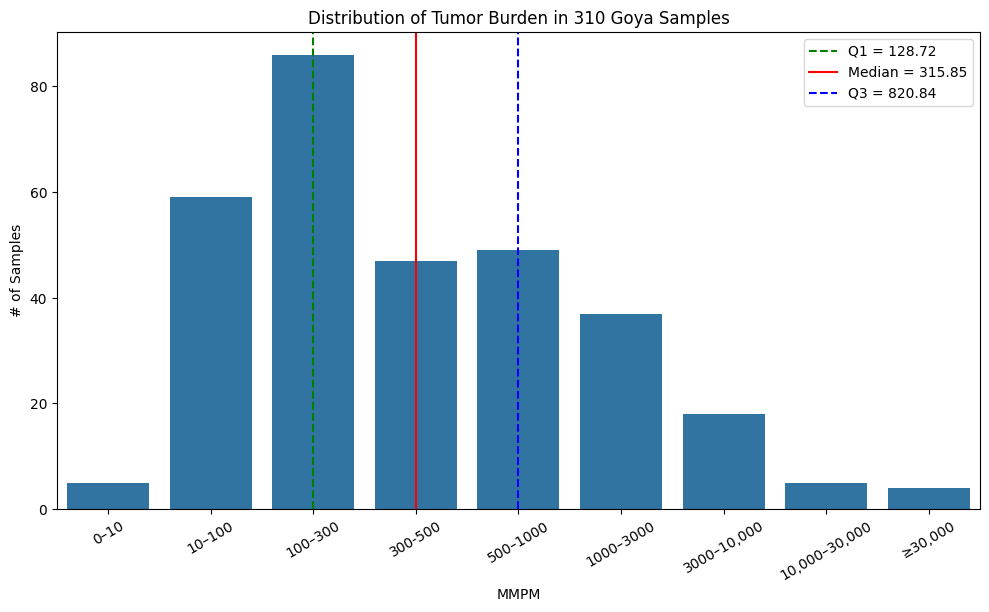

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cut into bins with labels
bins = [0, 10, 100, 300, 500, 1000, 3000, 10000, 30000, 100000]
labels = ['0–10','10–100','100–300','300-500','500–1000','1000–3000',
          '3000–10,000','10,000–30,000','≥30,000']

goya['MMPM_cut'] = pd.cut(
    goya['Corrected MMPM'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# 2. Get Q1, median, Q3
q1 = goya['Corrected MMPM'].quantile(0.25)
median_val = goya['Corrected MMPM'].median()
q3 = goya['Corrected MMPM'].quantile(0.75)

# 3. Determine which bin label each of these belongs to
q1_bin = pd.cut([q1], bins=bins, labels=labels, include_lowest=True)[0]
median_bin = pd.cut([median_val], bins=bins, labels=labels, include_lowest=True)[0]
q3_bin = pd.cut([q3], bins=bins, labels=labels, include_lowest=True)[0]

# Get the ordered category labels as a list
bin_list = list(goya['MMPM_cut'].cat.categories)
q1_index = bin_list.index(q1_bin)
median_index = bin_list.index(median_bin)
q3_index = bin_list.index(q3_bin)

# 4. Plot countplot of the binned variable
plt.figure(figsize=(10,6))
ax = sns.countplot(data=goya, x='MMPM_cut')

# 5. Add vertical lines at each bin index
# (Countplot places the first category at x=0, second at x=1, etc.)
ax.axvline(q1_index, color='green', linestyle='--', label=f"Q1 = {q1:.2f}")
ax.axvline(median_index, color='red', label=f"Median = {median_val:.2f}")
ax.axvline(q3_index, color='blue', linestyle='--', label=f"Q3 = {q3:.2f}")

plt.legend()
plt.xticks(rotation=30)
plt.tight_layout()
ax.set_title('Distribution of Tumor Burden in 310 Goya Samples')
ax.set_xlabel('MMPM')
ax.set_ylabel('# of Samples')

plt.show()


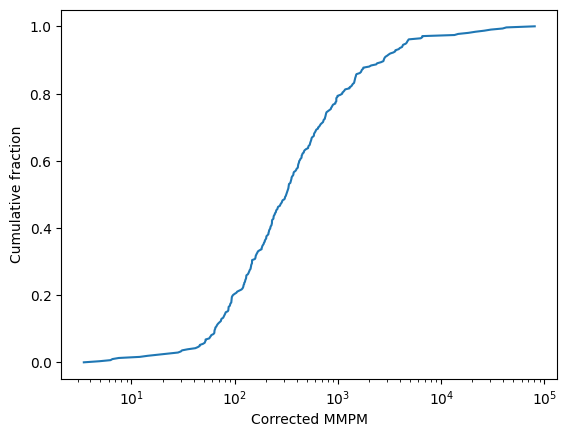

In [37]:
import numpy as np
import matplotlib.pyplot as plt

values = np.sort(goya['Corrected MMPM'].dropna())
yvals = np.arange(len(values)) / float(len(values) - 1)

fig, ax = plt.subplots()
ax.plot(values, yvals)
ax.set_xscale('log')  # optional if skewed
ax.set_xlabel('Corrected MMPM')
ax.set_ylabel('Cumulative fraction')
plt.show()

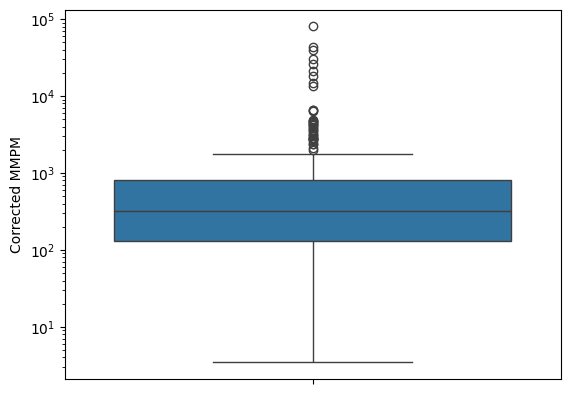

In [40]:
fig, ax = plt.subplots()
sns.boxplot(data=goya, y='Corrected MMPM', ax=ax)
ax.set_yscale('log')
plt.show()